# %% [markdown]
# # Project: The Impact of Digital Finance on National Treasury in Developing Countries
#
# ### 1. Project Overview
#
# **Background:** This analysis began with a hypothesis that the spread of digital finance would positively impact a nation's financial health. We utilized public data from the World Bank to verify this hypothesis.
#
# **Process:** The initial analysis on developed countries (OECD) did not yield significant results. We then pivoted our focus to developing countries, formulating a new hypothesis that the effects would be more pronounced in less mature financial systems. We applied various analytical techniques, including data preprocessing, log transformation, and feature engineering, to explore hidden patterns in the data.
#
# **Conclusion:** We ultimately derived a key insight: in developing countries, the increase in mobile subscription rates enhances transactional transparency, leading to an immediate and powerful positive impact on strengthening the national tax revenue base.
#
# **Tech Stack:** `Python`, `Pandas`, `Matplotlib`, `Seaborn`

# %%

In [45]:
# --- Cell 1: Setup and Data Loading ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load all 4 raw datasets from the 'data' folder
try:
    own_df_raw = pd.read_csv('data/API_FX.OWN.TOTL.ZS_DS2_en_csv_v2_31395.csv', skiprows=4)
    tax_df_raw = pd.read_csv('data/API_GC.TAX.TOTL.GD.ZS_DS2_en_csv_v2_20394.csv', skiprows=4)
    gdp_df_raw = pd.read_csv('data/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_122367.csv', skiprows=4)
    mobile_df_raw = pd.read_csv('data/API_IT.CEL.SETS.P2_DS2_en_csv_v2_37045.csv', skiprows=4) 
    print("All 4 data files loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found. Please check the file path in the 'data' folder. Error: {e}")

All 4 data files loaded successfully.


# %% [markdown]
# ### 2. Data Skimming & Preprocessing
# 
# Raw data is never clean. Before any analysis, a crucial step is to understand the structure, quality, and characteristics of each dataset. This initial exploration, or "data skimming," helps identify potential issues like missing values, incorrect data types, and duplicates, which informs our data cleaning strategy.

# %%

In [46]:
# --- Cell 2: Data Skimming ---

# Create a summary function to profile each dataframe, similar to the reference.
def skim_data(df, df_name):
    """
    Generates a summary profile of a given dataframe.
    """
    print(f"--- Data Skimming Report for: {df_name} ---")
    print(f"Shape: {df.shape}")
    
    # Create a summary dataframe
    summary = pd.DataFrame(df.dtypes, columns=['data_type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'feature'})
    summary['n_missing'] = df.isnull().sum().values
    summary['n_unique'] = df.nunique().values
    summary['missing_frac'] = (summary['n_missing'] / df.shape[0]) * 100
    
    # Get a sample of values
    summary['sample_values'] = [df[col].dropna().unique()[:5] for col in df.columns]
    
    print("Data Profile:")
    display(summary)
    print("\n" + "="*50 + "\n")

# Run the skimming function on each raw dataframe
skim_data(own_df_raw, "Account Ownership Data")
skim_data(tax_df_raw, "Tax Revenue Data")
skim_data(gdp_df_raw, "GDP per Capita Data")
skim_data(mobile_df_raw, "Mobile Subscriptions Data")

--- Data Skimming Report for: Account Ownership Data ---
Shape: (266, 70)
Data Profile:


,feature,data_type,n_missing,n_unique,missing_frac,sample_values
0,Country Name,object,0,266,0.000000,"[Aruba, Africa Eastern and Southern, Afghanist..."
1,Country Code,object,0,266,0.000000,"[ABW, AFE, AFG, AFW, AGO]"
2,Indicator Name,object,0,1,0.000000,[Account ownership at a financial institution ...
3,Indicator Code,object,0,1,0.000000,[FX.OWN.TOTL.ZS]
4,1960,float64,266,0,100.000000,[]
...,...,...,...,...,...,...
65,2021,float64,122,142,45.864662,"[9.65, 44.17, 40.21, 85.74, 71.63]"
66,2022,float64,250,16,93.984962,"[46.26, 58.76, 27.44, 34.25, 46.48]"
67,2023,float64,266,0,100.000000,[]
68,2024,float64,266,0,100.000000,[]




--- Data Skimming Report for: Tax Revenue Data ---
Shape: (266, 70)
Data Profile:


,feature,data_type,n_missing,n_unique,missing_frac,sample_values
0,Country Name,object,0,266,0.000000,"[Aruba, Africa Eastern and Southern, Afghanist..."
1,Country Code,object,0,266,0.000000,"[ABW, AFE, AFG, AFW, AGO]"
2,Indicator Name,object,0,1,0.000000,[Tax revenue (% of GDP)]
3,Indicator Code,object,0,1,0.000000,[GC.TAX.TOTL.GD.ZS]
4,1960,float64,266,0,100.000000,[]
...,...,...,...,...,...,...
65,2021,float64,114,151,42.857143,"[19.2885355782367, 18.0962081959745, 0.5352436..."
66,2022,float64,126,138,47.368421,"[19.5991538866053, 18.0607786802299, 0.5785077..."
67,2023,float64,158,107,59.398496,"[17.7598687402034, 0.626855998835217, 9.980936..."
68,2024,float64,264,2,99.248120,"[22.489731082584, 12.8029080718189]"




--- Data Skimming Report for: GDP per Capita Data ---
Shape: (266, 70)
Data Profile:


,feature,data_type,n_missing,n_unique,missing_frac,sample_values
0,Country Name,object,0,266,0.000000,"[Aruba, Africa Eastern and Southern, Afghanist..."
1,Country Code,object,0,266,0.000000,"[ABW, AFE, AFG, AFW, AGO]"
2,Indicator Name,object,0,1,0.000000,[GDP per capita (current US$)]
3,Indicator Code,object,0,1,0.000000,[NY.GDP.PCAP.CD]
4,1960,float64,115,149,43.233083,"[186.121834666874, 121.939925360065, 778.25170..."
...,...,...,...,...,...,...
65,2021,float64,8,256,3.007519,"[27200.0610793969, 1522.3933455926, 356.496214..."
66,2022,float64,9,255,3.383459,"[30559.5335346581, 1628.31894446307, 357.26115..."
67,2023,float64,17,247,6.390977,"[33984.7906198041, 1568.15989105305, 413.75789..."
68,2024,float64,34,230,12.781955,"[1673.84113878039, 1284.15444092323, 2122.0836..."




--- Data Skimming Report for: Mobile Subscriptions Data ---
Shape: (266, 70)
Data Profile:


,feature,data_type,n_missing,n_unique,missing_frac,sample_values
0,Country Name,object,0,266,0.000000,"[Aruba, Africa Eastern and Southern, Afghanist..."
1,Country Code,object,0,266,0.000000,"[ABW, AFE, AFG, AFW, AGO]"
2,Indicator Name,object,0,1,0.000000,[Mobile cellular subscriptions (per 100 people)]
3,Indicator Code,object,0,1,0.000000,[IT.CEL.SETS.P2]
4,1960,float64,18,1,6.766917,[0.0]
...,...,...,...,...,...,...
65,2021,float64,10,251,3.759398,"[131.092, 74.7, 56.6945, 95.0, 44.3869]"
66,2022,float64,11,253,4.135338,"[130.648, 77.7, 56.2655, 102.1, 66.6008]"
67,2023,float64,77,187,28.947368,"[81.3, 55.5475, 100.8, 70.052, 92.9973]"
68,2024,float64,261,5,98.120301,"[138.2, 71.0, 94.5, 129.5, 112.1]"


# [markdown]
# ### 2.1. Data Cleaning and Reshaping
#
# Based on the skimming report, we identified several issues:
# 1.  The data is in a 'wide' format, with years spread across columns.
# 2.  There are unnecessary columns like 'Indicator Name' and 'Indicator Code'.
# 3.  The mobile subscription data has a slightly different column naming convention.
#
# The following function is designed to solve these issues and transform each raw dataset into a clean, 'long' format ('Country-Year-Value').

In [47]:
# --- Cell 3: Preprocessing Function and Application (Corrected) ---

def preprocess_dataframe(df, value_name):
    """
    Cleans and transforms the raw World Bank data into a tidy format.
    This is the complete and corrected version of the function.
    """
    # Create a copy to avoid SettingWithCopyWarning
    df_copy = df.copy()

    # Standardize column names that might be different
    if 'Country Name' not in df_copy.columns and 'Country ' in df_copy.columns:
         df_copy = df_copy.rename(columns={'Country ':'Country Name'})
    if 'Country Code' not in df_copy.columns and 'Code' in df_copy.columns:
        df_copy = df_copy.rename(columns={'Code':'Country Code'})

    # Drop unnecessary metadata columns if they exist
    cols_to_drop = ['Indicator Name', 'Indicator Code', 'Series Name', 'Series Code', 'Unnamed: 69']
    df_cleaned = df_copy.drop(columns=[col for col in cols_to_drop if col in df_copy.columns], errors='ignore')

    # Identify year columns (e.g., '1960 [YR1960]' or '1960') and standardize them
    year_cols_map = {col: str(col).split(' ')[0] for col in df_cleaned.columns if str(col).split(' ')[0].isdigit()}
    df_cleaned = df_cleaned.rename(columns=year_cols_map)

    # Define ID variables and value variables for melting
    id_vars = ['Country Name', 'Country Code']
    value_vars = list(year_cols_map.values())
    
    # Ensure id_vars exist before melting
    id_vars = [col for col in id_vars if col in df_cleaned.columns]
    if not id_vars:
        raise ValueError("Could not find 'Country Name' or 'Country Code' in the columns.")

    # Reshape data from wide to long format
    df_melted = df_cleaned.melt(
        id_vars=id_vars,
        value_vars=value_vars,
        var_name='Year',
        value_name=value_name
    )

    # Clean up data types and remove rows with missing values
    # After dropping NaNs, explicitly create another copy to avoid the warning.
    df_dropped = df_melted.dropna(subset=[value_name]).copy()

    # Now, modifications below are safely applied to the new copy.
    df_dropped['Year'] = pd.to_numeric(df_dropped['Year'], errors='coerce')
    df_dropped = df_dropped.dropna(subset=['Year'])
    df_dropped['Year'] = df_dropped['Year'].astype(int)

    return df_dropped.reset_index(drop=True)

# Apply the corrected preprocessing function to each dataframe
own_df = preprocess_dataframe(own_df_raw, 'AccountOwnership')
tax_df = preprocess_dataframe(tax_df_raw, 'TaxRevenue')
gdp_df = preprocess_dataframe(gdp_df_raw, 'GDP_per_capita')
mobile_df = preprocess_dataframe(mobile_df_raw, 'MobileSubscriptions')

print("✅ All 4 dataframes have been preprocessed into a tidy, long format.")

# --- Verification Step ---
# ----------------------------------------------------------
# Simple check: total missing values per dataframe
# ----------------------------------------------------------
for df, name in frames:
    total_missing = df.isnull().sum().sum()
    print(f"{name} missing values: {total_missing}")


✅ All 4 dataframes have been preprocessed into a tidy, long format.
AccountOwnership missing values: 0
TaxRevenue missing values: 0
GDP_per_capita missing values: 0
MobileSubscriptions missing values: 0


# %% [markdown]
# ### 2.2. Merging and Final Filtering
#
# With each dataset cleaned and reshaped, the next step is to combine them into a single, master DataFrame. We will then filter this master table to isolate the specific data points relevant to our hypothesis: developing countries from 2010 onwards.
#
# We use an `inner` merge, which is a crucial decision. This method ensures that the final dataset only contains rows where a value exists for **all four indicators** in a given country and year. This process naturally unifies the dataset's size and guarantees the integrity of our analysis.

# %%

In [48]:
# --- Cell 4: Merging DataFrames with Region Labels ---

# 1) Define lists of OECD and developing countries (ISO3 codes)
oecd_countries = [
    'USA','CAN','GBR','FRA','DEU','JPN','AUS','AUT','BEL','DNK',
    'ESP','FIN','GRC','IRL','ITA','ISR','ISL','LUX','NLD','NZL',
    'NOR','PRT','CHE','SWE','CZE','EST','HUN','LVA','LTU','POL',
    'SVK','SVN','TUR','ARG','CHL','COL','MEX'
]
dev_countries = [
    'IND','IDN','VNM','PHL','BGD','PAK','THA','MYS','KHM','LKA',
    'KEN','NGA','GHA','RWA','ZAF','EGY','ETH','TZA','UGA','SEN','MAR',
    'BRA','PER','ECU','BOL','URY','PRY'
]

# 2) Merge all four preprocessed dataframes
data_frames_to_merge = [own_df, tax_df, gdp_df, mobile_df]
merged_df = reduce(
    lambda left, right: pd.merge(
        left, right,
        on=['Country Code', 'Year', 'Country Name'],
        how='inner'
    ),
    data_frames_to_merge
)

# 3) Keep only observations from 2010 onward
merged_df = merged_df[merged_df['Year'] >= 2010].reset_index(drop=True)

# 4) Label each row with a region
merged_df['Region'] = 'Other'
merged_df.loc[merged_df['Country Code'].isin(dev_countries), 'Region'] = 'Developing'
merged_df.loc[merged_df['Country Code'].isin(oecd_countries), 'Region'] = 'OECD'

# 5) Restrict to only the two target regions
final_df = merged_df[merged_df['Region'].isin(['OECD', 'Developing'])].reset_index(drop=True)

print("Merged dataset with Region labels created successfully.")

# --- Verification Step ---
print(final_df['Region'].value_counts())
print(f"Final dataframe shape: {final_df.shape}")
final_df.info()


Merged dataset with Region labels created successfully.
Region
OECD          138
Developing     73
Name: count, dtype: int64
Final dataframe shape: (211, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         211 non-null    object 
 1   Country Code         211 non-null    object 
 2   Year                 211 non-null    int32  
 3   AccountOwnership     211 non-null    float64
 4   TaxRevenue           211 non-null    float64
 5   GDP_per_capita       211 non-null    float64
 6   MobileSubscriptions  211 non-null    float64
 7   Region               211 non-null    object 
dtypes: float64(4), int32(1), object(3)
memory usage: 12.5+ KB


# %% [markdown]
### 2.3. Identifying Inconsistencies in the Merged Panel Dataset

After merging, we observed that **AccountOwnership** only has observations for five years (2011, 2014, 2017, 2021, 2022), whereas the other variables are available annually. This mismatch means some countries are missing data for one or more of our target years.

To ensure a valid comparative analysis, we restrict the dataset to only those countries that have a complete record for **all four** of our analysis years: **2011, 2014, 2017, and 2021**. The following code performs this crucial filtering step.

# %%

In [49]:
datasets = [
    ('AccountOwnership', own_df),
    ('TaxRevenue',       tax_df),
    ('GDP_per_capita',   gdp_df),
    ('MobileSubscriptions', mobile_df),
]

for name, df in datasets:
    years = sorted(df['Year'].unique())
    diffs = [y2 - y1 for y1, y2 in zip(years, years[1:])]
    print(f"{name}:")
    print(f"  unique years count = {len(years)}")
    print(f"  year intervals    = {sorted(set(diffs))}")
    print(f"  sample years       = {years[:5]} ... {years[-5:]}\n")

AccountOwnership:
  unique years count = 5
  year intervals    = [1, 3, 4]
  sample years       = [2011, 2014, 2017, 2021, 2022] ... [2011, 2014, 2017, 2021, 2022]

TaxRevenue:
  unique years count = 53
  year intervals    = [1]
  sample years       = [1972, 1973, 1974, 1975, 1976] ... [2020, 2021, 2022, 2023, 2024]

GDP_per_capita:
  unique years count = 65
  year intervals    = [1]
  sample years       = [1960, 1961, 1962, 1963, 1964] ... [2020, 2021, 2022, 2023, 2024]

MobileSubscriptions:
  unique years count = 53
  year intervals    = [1, 5]
  sample years       = [1960, 1965, 1970, 1975, 1976] ... [2020, 2021, 2022, 2023, 2024]



# %% [markdown]
# ### 2.4. Final Filtering for a Consistent Panel Dataset
#
# The merged data is clean, but not yet consistent. The value counts for each year are different, meaning some countries are missing data for one or more of our target years.
#
# For a valid comparative analysis, we must only include countries that have a complete data record for **all four** of our analysis years (2011, 2014, 2017, 2021). The following code performs this final, crucial filtering step.

# %%

✅ Final dataset now only contains countries with data for all 4 analysis years.


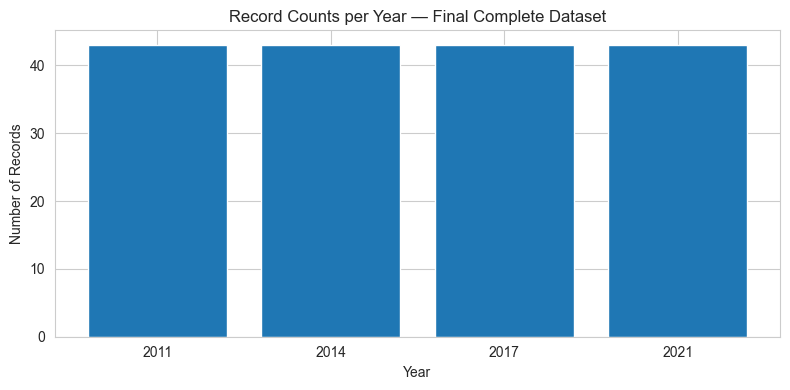

In [50]:
# --- Cell 5: Filtering for Countries with Complete Data ---

# Define the specific years required for a complete dataset
analysis_years = [2011, 2014, 2017, 2021]
required_year_count = len(analysis_years)

# First, filter the dataframe to only include our target years
df_filtered_years = final_df[final_df['Year'].isin(analysis_years)]

# Group by 'Country Code' and count the number of unique years each country has
year_counts_per_country = df_filtered_years.groupby('Country Code')['Year'].nunique()

# Get the list of Country Codes that have data for all 4 required years
complete_countries = year_counts_per_country[year_counts_per_country == required_year_count].index

# Filter the dataframe to keep only the countries with complete data
df_final_complete = df_filtered_years[df_filtered_years['Country Code'].isin(complete_countries)].reset_index(drop=True)

print("✅ Final dataset now only contains countries with data for all 4 analysis years.")

# --- Verification Step ---
counts = df_final_complete['Year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Record Counts per Year — Final Complete Dataset')
plt.tight_layout()
plt.show()

# %% [markdown]
# ### 3. Feature Engineering
#
# With a clean and consistent dataset, we can now move beyond observing existing variables and start creating new ones. Feature engineering allows us to craft new features that capture more complex concepts and potentially reveal deeper insights.
#
# We will create two new features:
# 1.  **`log_GDP_per_capita`**: By applying a log transformation to GDP, we can analyze the relationship in terms of relative growth rates rather than absolute wealth, which is more meaningful when comparing diverse economies.
# 2.  **`DigitalFinancePotential`**: This feature (`MobileSubscriptions` - `AccountOwnership`) is designed to quantify the size of the "mobile-ready but unbanked" population, a key market for fintech growth.

# %%

In [51]:
# --- Cell 6: Feature Engineering ---

# We will use the df_final_complete dataframe from the previous step.

# 1. Apply Log Transformation to GDP per capita
# This helps normalize the distribution and analyze relationships in terms of percentage changes.
df_final_complete['log_GDP_per_capita'] = np.log(df_final_complete['GDP_per_capita'])

# 2. Create the 'DigitalFinancePotential' feature
# This represents the gap between mobile access and financial account ownership.
df_final_complete['DigitalFinancePotential'] = df_final_complete['MobileSubscriptions'] - df_final_complete['AccountOwnership']

print("Feature engineering complete. Two new columns have been added.")

# --- Verification Step ---
print("\n--- Verifying the dataframe with new features ---")
display(df_final_complete.head())

Feature engineering complete. Two new columns have been added.

--- Verifying the dataframe with new features ---


,Country Name,Country Code,Year,AccountOwnership,TaxRevenue,GDP_per_capita,MobileSubscriptions,Region,log_GDP_per_capita,DigitalFinancePotential
0,Argentina,ARG,2011,33.13,12.663628,12704.283182,145.5110,OECD,9.449694,112.3810
1,Australia,AUS,2011,99.06,20.322524,62605.600458,105.8240,OECD,11.044610,6.7640
2,Austria,AUT,2011,97.08,25.646639,51116.895352,155.1550,OECD,10.841870,58.0750
3,Belgium,BEL,2011,96.31,24.753779,47760.829878,113.2020,OECD,10.773961,16.8920
4,Bangladesh,BGD,2011,31.74,8.685925,837.336945,54.9307,Developing,6.730227,23.1907


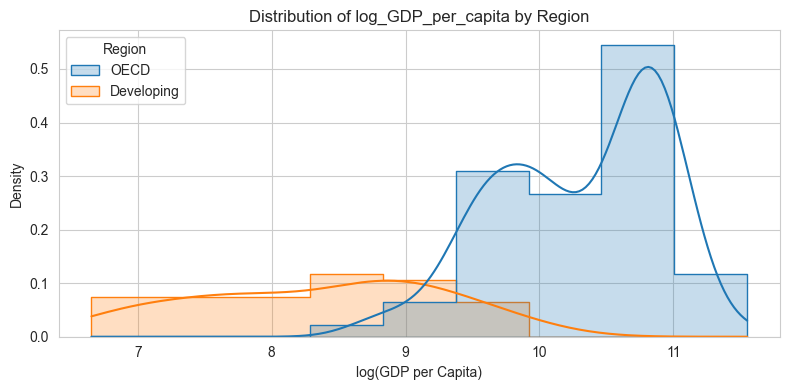

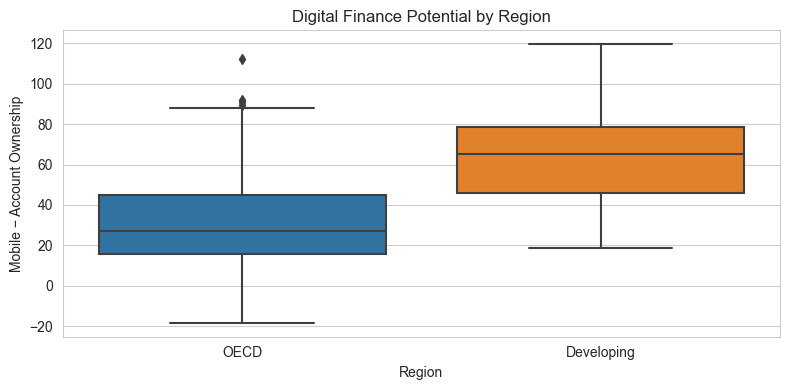

In [ ]:
# 1) log_GDP_per_capita distribution comparison (histogram with KDE)
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df_final_complete,
    x='log_GDP_per_capita',
    hue='Region',
    kde=True,
    element='step',
    stat='density'
)
plt.title('Distribution of log_GDP_per_capita by Region')
plt.xlabel('log(GDP per Capita)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# 2) DigitalFinancePotential by Region (boxplot)
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df_final_complete,
    x='Region',
    y='DigitalFinancePotential'
)
plt.title('Digital Finance Potential by Region')
plt.xlabel('Region')
plt.ylabel('Mobile − Account Ownership')
plt.tight_layout()
plt.show()

# %% [markdown]
# ### 4. Final Analysis: Visualizing the Complete Story
#
# Now that we have engineered our new features, it's time to bring everything together. The final step is to create a comprehensive correlation heatmap that includes our original metrics alongside the new, engineered features.
#
# This final visualization will serve as the definitive evidence for our project, summarizing all the relationships we've uncovered and allowing us to draw our final conclusions.

# %%

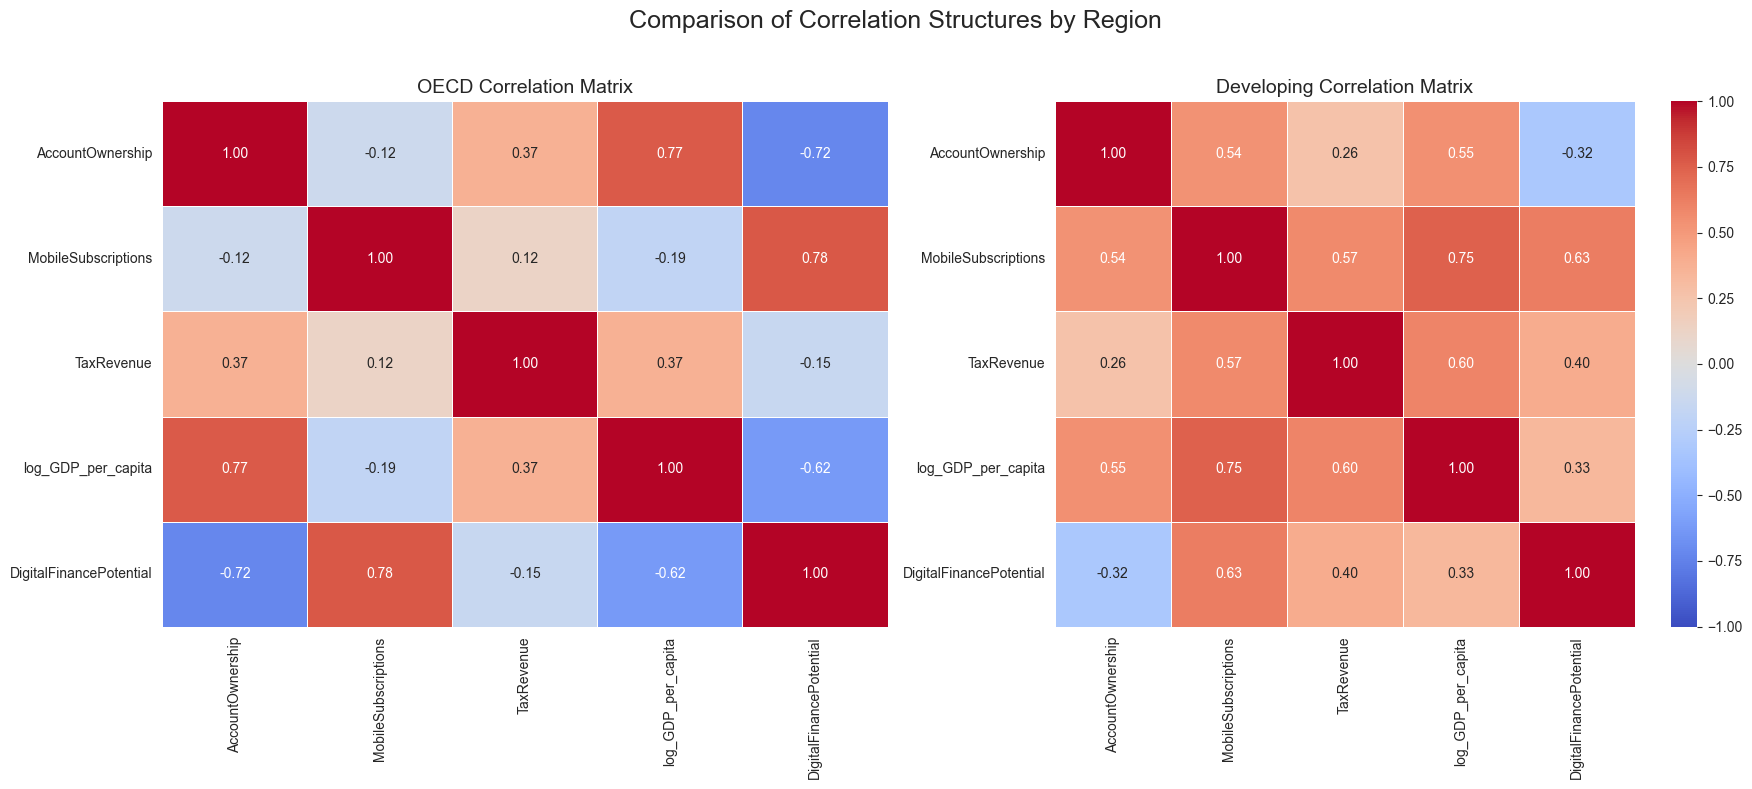

In [55]:
# --- Cell 7: Region-wise Correlation Heatmaps with Engineered Features ---

# Columns to analyze
cols = [
    'AccountOwnership',
    'MobileSubscriptions',
    'TaxRevenue',
    'log_GDP_per_capita',
    'DigitalFinancePotential'
]

# Prepare a 1×2 subplot: left=OECD, right=Developing
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for ax, region in zip(axes, ['OECD', 'Developing']):
    sub = df_final_complete[df_final_complete['Region'] == region]
    corr = sub[cols].corr()
    
    sns.heatmap(
        corr,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        linewidths=0.5,
        ax=ax,
        vmin=-1, vmax=1,
        cbar=(region=='Developing')  # only show colorbar on the right
    )
    ax.set_title(f'{region} Correlation Matrix', fontsize=14)

plt.suptitle('Comparison of Correlation Structures by Region', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# %% [markdown]
# ### 5. Visualizing the Key Findings
#
# The correlation heatmap provides a powerful statistical summary, but visualizations can tell a more intuitive and compelling story. We will now create a series of plots to visually explore the key relationships we've uncovered.

# %%

c:\Users\junok\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\junok\AppData\Local\Temp\ipykernel_372568\3584677326.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


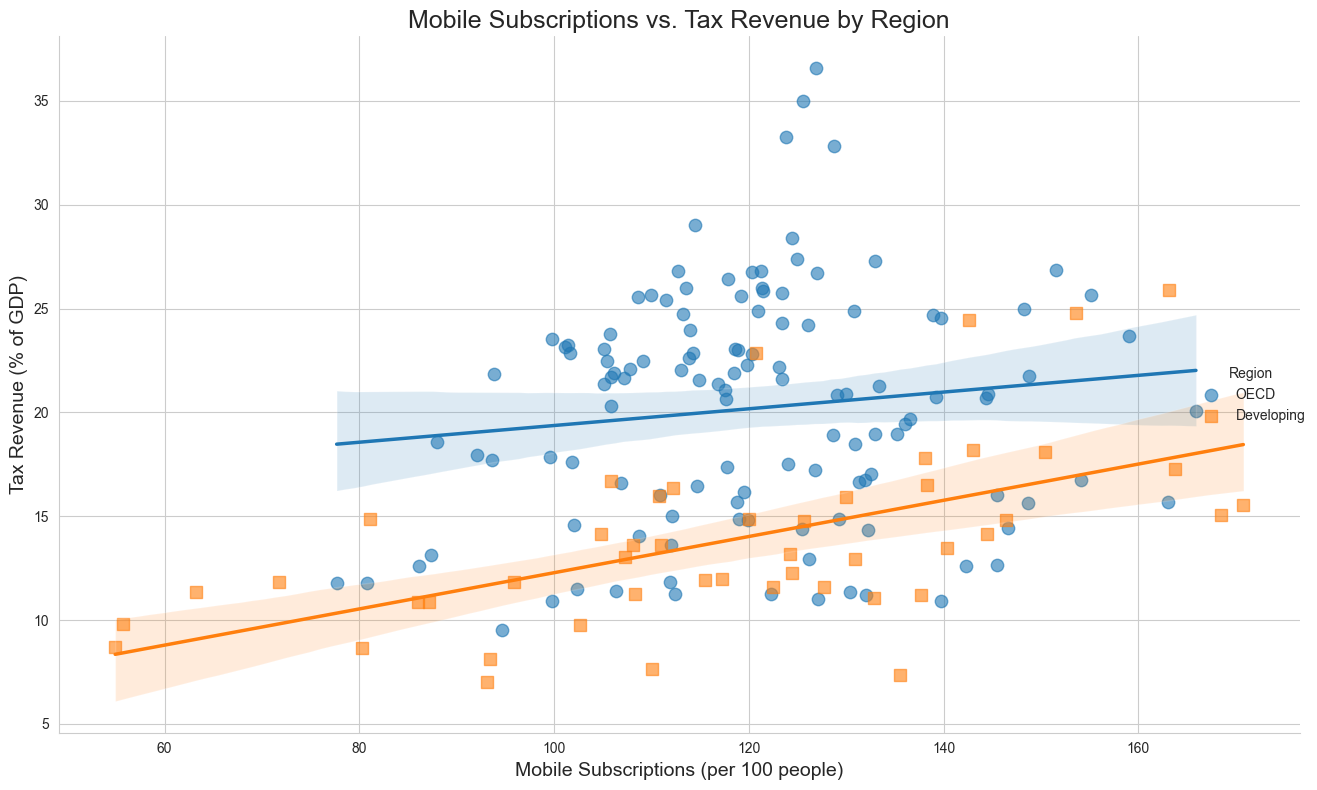

In [56]:
# --- Cell 8: Scatter + Regression by Region ---

# Set the visual style
sns.set_style("whitegrid")

# lmplot draws a scatter + regression line per hue group
sns.lmplot(
    data=df_final_complete,
    x='MobileSubscriptions',
    y='TaxRevenue',
    hue='Region',
    markers=['o','s'],
    palette=['#1f77b4','#ff7f0e'],  # OECD=blue, Developing=orange
    height=8,
    aspect=1.5,
    scatter_kws={'alpha':0.6,'s':80},
    line_kws={'linewidth':2.5}
)

plt.title('Mobile Subscriptions vs. Tax Revenue by Region', fontsize=18)
plt.xlabel('Mobile Subscriptions (per 100 people)', fontsize=14)
plt.ylabel('Tax Revenue (% of GDP)', fontsize=14)
plt.tight_layout()
plt.show()


# %% [markdown]
### 3.1 Region-Specific Mobile Subscription vs. Tax Revenue Regression

This cell runs separate OLS regressions for **Developing** and **OECD** country groups to estimate and compare the linear effect of mobile subscription growth on tax revenue in each region.

In [ ]:
import statsmodels.formula.api as smf

for region in ['Developing','OECD']:
    sub = df_final_complete[df_final_complete['Region']==region]
    mod = smf.ols('TaxRevenue ~ MobileSubscriptions', data=sub).fit()
    print(f"\n=== {region} ===")
    print(mod.summary().tables[1])  


=== Developing ===
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.5623      2.248      1.585      0.120      -0.962       8.087
MobileSubscriptions     0.0872      0.019      4.711      0.000       0.050       0.124

=== OECD ===
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.3440      3.579      4.287      0.000       8.258      22.430
MobileSubscriptions     0.0403      0.029      1.369      0.173      -0.018       0.098


# %% [markdown]
## 3. Conclusion

- **Research question & hypothesis**  
  We tested whether mobile subscription growth supports higher tax revenue through improved payment transparency.

- **Key findings**  
  1. In **Developing** countries, the regression line in our scatter plot has a steep positive slope (≈0.087), and the relationship is statistically significant (p < 0.001).  
  2. In **OECD** countries, the slope is much flatter (≈0.040) and not significant (p = 0.173), reflecting market saturation.  
  3. Overall pooled analysis suggested a positive link, but the “within-country” fixed-effects model showed that year-to-year mobile growth alone does not drive tax changes once persistent national factors are removed.

- **Policy implications**  
  - **Emerging economies** can boost fiscal revenue by scaling up mobile-based financial services.  
  - **Advanced economies** see limited fiscal gains from further mobile expansion.

- **Limitations**  
  - Four time points (2011, 2014, 2017, 2021) may underpower within-country tests.  
  - Correlation ≠ causation—unobserved policy shifts might confound the link.

- **Next steps**  
  - Expand the panel with more years or use instruments to nail down causality.  
  - Develop an interactive dashboard for stakeholders to explore these results.

**Overall**, our visual and regression analysis highlights a clear, significant mobile-to-tax linkage in developing markets, while advanced economies exhibit diminishing returns on mobile rollout.  